In [39]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn import metrics
import matplotlib.pyplot as plt

In [57]:
words=stopwords.words('english')
words.extend(["are","m","im","every","so","father","mother","parent","son","daughter","child","husband",
             "wife","spouse","brother","sister","sibling","grandfather","grandmother","grandparents","r",
             "grandson","granddaughter","grandchild","uncle","aunt","nephew","niece","cousin","quote","u","too"])
'''rem=["don't",'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't",
     'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 
     'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 
     'won', "won't", 'wouldn', "wouldn't",]
for x in rem:
    words.remove(x)'''
negprob={}
posprob={}
count={}
poscount={}
negcount={}
lemmatizer = WordNetLemmatizer() 
spell=SpellChecker()
wrongwords={}
lemmatized={}
msg=[]
slang={}

In [41]:
def remove_symbols(line,replacement):
    y=re.sub(r'&lt',"",line)
    y=re.sub(r'&gt',"",y)
    y=re.sub(r'\W+',replacement,y)
    y=re.sub(r' {2,}'," ",y)
    return y.strip()

def train_test_split_list(value,label,test_size=0.3):
    xtrain=[]
    xtest=[]
    ytrain=[]
    ytest=[]
    i=int(test_size*len(label))
    j=0
    while j<i:
        l=len(label)
        index=random.randint(0,l-1)
        vl=value.pop(index)
        lb=label.pop(index)
        if vl!="":
            xtest.append(vl)
            ytest.append(lb)
        j+=1
    xtrain=value
    ytrain=label
    return xtrain,xtest,ytrain,ytest

def read(filename,encoding="utf8"):
    global msg
    file=open(filename,'r',encoding=encoding)
    msg= file.readlines()
    x=[]
    y=[]
    for i in msg:
        try:
            l,v=i.split(',')
            x.append(v)
            y.append(int(l))
        except:
            y.append(0)
    return x,y



def train(xtrain,ytrain,ttype="text"):
    global count,negprob,posprob,poscount,negcount,words    
    for index,line in enumerate(xtrain):
        if len(line)!=0:
            y=line.split()
            y=[x for x in y if len(x)>1]
            for j in y:
                if j not in count:
                    count[j]=1
                else:
                    count[j]+=1
                if ytrain[index]==1:            
                    if j not in poscount:
                        poscount[j]=1
                    else:
                        poscount[j]+=1
                elif ytrain[index]==0:
                    if j not in negcount:
                        negcount[j]=1
                    else:
                        negcount[j]+=1
    for i in count:
        if i in poscount:
            posprob[i]=poscount[i]/count[i]
            negprob[i]=1-posprob[i]
        elif i in negcount:
            negprob[i]=negcount[i]/count[i]
            posprob[i]=1-negprob[i]
            

def test(xtest):
    global count,negprob,posprob
    ypred=[]
    for line in xtest:
        y=[]
        y.extend(line.split())
        pos_pred_prob={}
        neg_pred_prob={}
        pcount=0
        ncount=0
        neutcount=0
        for i in y:
            if i not in posprob:
                pos_pred_prob[i]=0
            if i not in negprob:
                neg_pred_prob[i]=0
            if i in posprob:
                pos_pred_prob[i]=posprob[i]
                neg_pred_prob[i]=1-posprob[i]
            if pos_pred_prob[i]>neg_pred_prob[i]:
                pcount+=1
            elif pos_pred_prob[i]<neg_pred_prob[i]:
                ncount+=1
            else:
                neutcount+=1
        if pcount+neutcount>ncount:
            ypred.append(1)
        elif ncount>pcount and ncount>neutcount:
            ypred.append(0)
        else:
            pos=0
            neg=0
            for i in pos_pred_prob:
                pos+=pos_pred_prob[i]
                neg+=neg_pred_prob[i]
            if pos>neg:
                ypred.append(1)
            elif pos < neg:
                ypred.append(0)
            else:
                ypred.append(1)
    return ypred


In [42]:
for x in words:
    words.remove(x)
    words.append(remove_symbols(x,""))   


fi=open('slang.csv')
for x in fi:
    x=x.split(',')
    slang[x[0].lower()]=x[1].replace("\n","").lower()

    
x,y=read('preprocessed.csv',encoding="latin1")
xtrain,xtest,ytrain,ytest=train_test_split_list(x,y,test_size=0.3)

In [43]:
train(xtrain,ytrain)

In [44]:
pred=test(xtest)
print(len(pred),len(ytest))
oacc=metrics.accuracy_score(ytest,pred)
oprec=metrics.precision_score(ytest,pred)
orec=metrics.recall_score(ytest,pred)
cfm=metrics.confusion_matrix(ytest,pred)
print("accuracy=",oacc)
print("Recall=",orec)
print("Precision=",oprec)
print("Confusion Matrix\n",cfm)

13436 13436
accuracy= 0.6909050312593034
Recall= 0.8119298245614035
Precision= 0.6728308909048616
Confusion Matrix
 [[3498 2813]
 [1340 5785]]


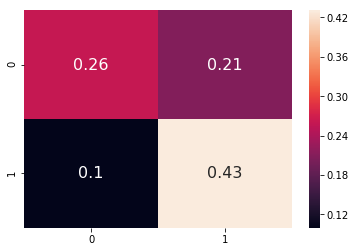

In [45]:
import seaborn as sb
sb.heatmap(cfm/len(pred), annot=True,annot_kws={"size": 16})

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics

msg=pd.read_csv("preprocessed.csv",names=["label","value"],encoding="latin1")
emoji=pd.read_csv("all_emo.csv",names=["label","value"])
xtrain1,xtest1,ytrain1,ytest1=train_test_split(msg.value,msg.label,test_size=0.3)

cv= CountVectorizer()
xtr_dtm=cv.fit_transform(xtrain1.values.astype('U'))
xte_dtm=cv.transform(xtest1.values.astype('U'))
xemo=cv.fit_transform(emoji.value)

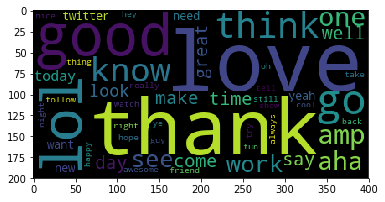

In [49]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
c=""
for i,x in msg["value"].items():
    if msg["label"][i]==1:
        c+=str(x)+" "
wordcloud2 = WordCloud(max_words=50).generate(c)
plt.imshow(wordcloud2)

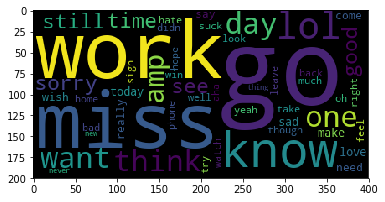

In [50]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
c=""
for i,x in msg["value"].items():
    if msg["label"][i]==0:
        c+=str(x)+" "
wordcloud2 = WordCloud(max_words=50).generate(c)
plt.imshow(wordcloud2)

In [59]:
from sklearn.naive_bayes import MultinomialNB

clf=MultinomialNB()

clf.fit(xemo,emoji.label)
clf.fit(xtr_dtm,ytrain1)
MNBpred= clf.predict(xte_dtm)

MNBacc=metrics.accuracy_score(ytest1,MNBpred)
MNBrec=metrics.recall_score(ytest1,MNBpred)
MNBprec=metrics.precision_score(ytest1,MNBpred)
MNBcfm=metrics.confusion_matrix(ytest1,MNBpred)
print("accuracy=",MNBacc)
print("Recall=",MNBrec)
print("Precision=",MNBprec)
print("Confusion Matrix\n",MNBcfm)

accuracy= 0.7251618664880554
Recall= 0.7433542101600557
Precision= 0.7428372739916551
Confusion Matrix
 [[4403 1849]
 [1844 5341]]


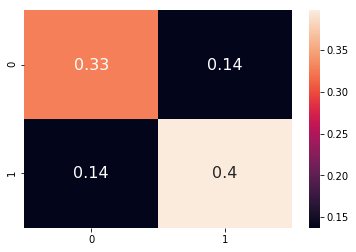

In [60]:
import seaborn as sb
sb.heatmap(MNBcfm/len(MNBpred), annot=True,annot_kws={"size": 16})

In [53]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear')

svclassifier.fit(xemo,emoji.label)
svclassifier.fit(xtr_dtm,ytrain1)
ypred=svclassifier.predict(xte_dtm)

svcacc=metrics.accuracy_score(ytest1,ypred)
svcprec=metrics.precision_score(ytest1,ypred)
svcrec=metrics.recall_score(ytest1,ypred)
svccfm=metrics.confusion_matrix(ytest1,ypred)
print("accuracy=",svcacc)
print("Recall=",svcrec)
print("Precision=",svcprec)
print("Confusion Matrix\n",svccfm)

accuracy= 0.716082458882191
Recall= 0.7643831762554508
Precision= 0.7174544494322683
Confusion Matrix
 [[4188 2140]
 [1675 5434]]


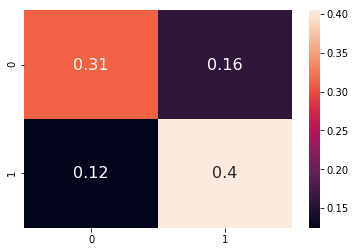

In [54]:
import seaborn as sb
sb.heatmap(svccfm/len(ypred), annot=True,annot_kws={"size": 16})

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300)
clf = clf.fit(xtr_dtm,ytrain1)
ry_pred = clf.predict(xte_dtm)
racc=metrics.accuracy_score(ytest1,ry_pred)
rprec=metrics.precision_score(ytest1,ry_pred)
rrec=metrics.recall_score(ytest1,ry_pred)
rcfm=metrics.confusion_matrix(ytest1,ry_pred)
print("accuracy=",racc)
print("Recall=",rrec)
print("Precision=",rprec)
print("Confusion Matrix\n",rcfm)

accuracy= 0.7174964649847436
Recall= 0.7285131523421016
Precision= 0.7351312987934705
Confusion Matrix
 [[4462 1866]
 [1930 5179]]


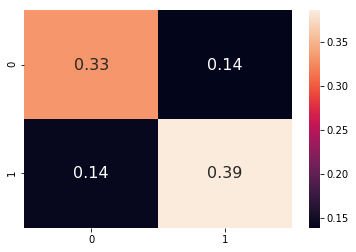

In [56]:
import seaborn as sb
sb.heatmap(rcfm/len(ry_pred), annot=True,annot_kws={"size": 16})